# <span style="color: #2E86C1; font-family: Arial, sans-serif;">Task-03: Bank Term Deposit Prediction</span>
#### <span style=" font-family: 'Courier New', Courier, monospace;">Developed by: Azhar Derardja</span>


In [3]:
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt



In [4]:

# Step 1: Load the dataset
file_path = 'bank.csv' 
bank = pd.read_csv(file_path, sep=';')


In [5]:
# Step 2: Preprocess the data
df_encoded = pd.get_dummies(bank, drop_first=True)

# Define the feature set (X) and the target variable (y)
X = df_encoded.drop('y_yes', axis=1)  # 'y_yes' is the target variable after encoding
y = df_encoded['y_yes']

In [6]:
# Step 3: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [7]:
# Step 4: Build the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42, max_depth=5)  # Limit tree depth
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [8]:
# Step 5: Evaluate the model
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print the evaluation results
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.8968312453942521
Confusion Matrix:
[[1166   39]
 [ 101   51]]
Classification Report:
              precision    recall  f1-score   support

       False       0.92      0.97      0.94      1205
        True       0.57      0.34      0.42       152

    accuracy                           0.90      1357
   macro avg       0.74      0.65      0.68      1357
weighted avg       0.88      0.90      0.88      1357



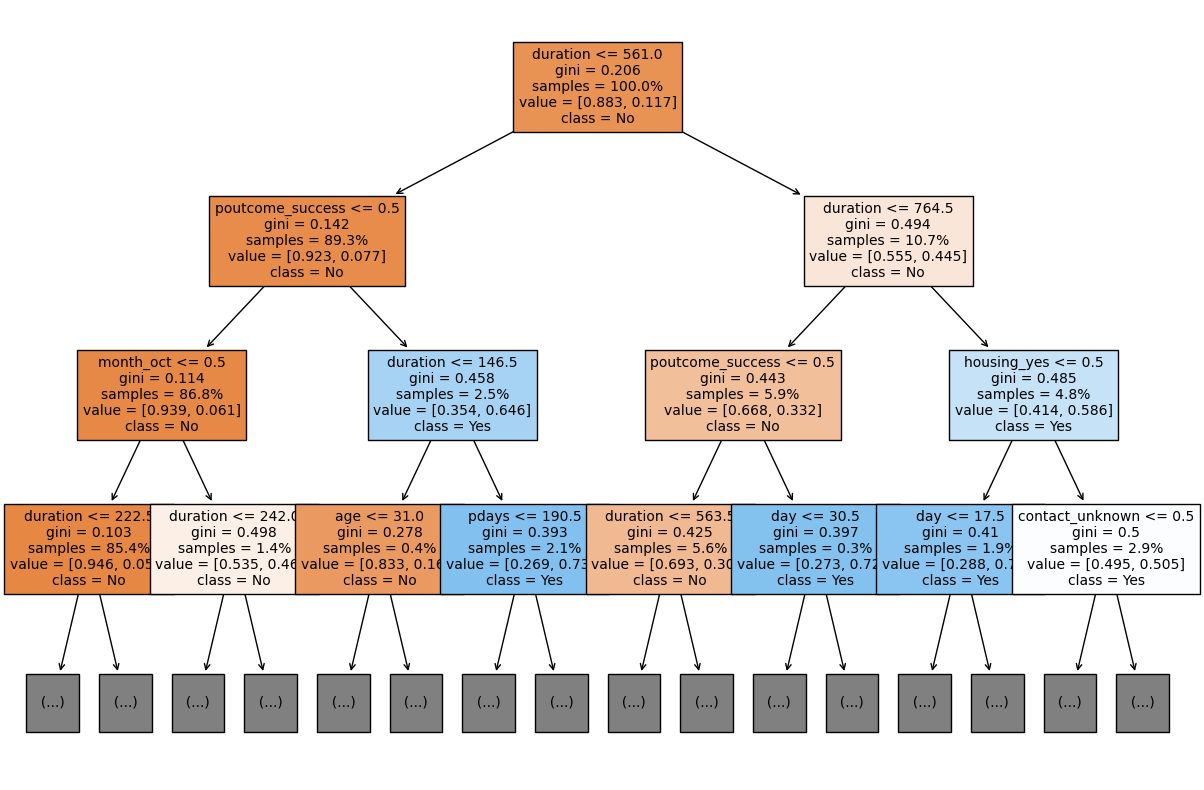

In [9]:

# Step 6: Visualize the Decision Tree
fig = plt.figure(figsize=(15, 10))  # Adjust the figure size if needed

# Convert feature names to a list
feature_names = X.columns.tolist()

# Plot the tree
_ = plot_tree(clf, filled=True, feature_names=feature_names, class_names=['No', 'Yes'], 
              fontsize=10, proportion=True, max_depth=3)  # Limit depth for visualization

# Show the plot
plt.show()